Data: https://archive.ics.uci.edu.

Instruction: Choose a dataset and perform a data storytelling, choose the proper data visualization, do not use words, your graphs must tell a story.

In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
online_shoppers_purchasing_intention_dataset = fetch_ucirepo(id=468) 
  
# data (as pandas dataframes) 
X = online_shoppers_purchasing_intention_dataset.data.features 
Y = online_shoppers_purchasing_intention_dataset.data.targets 
  
# metadata 
#print(online_shoppers_purchasing_intention_dataset.metadata) 
  
# variable information 
print(online_shoppers_purchasing_intention_dataset.variables) 

                       name     role         type demographic description  \
0            Administrative  Feature      Integer        None        None   
1   Administrative_Duration  Feature      Integer        None        None   
2             Informational  Feature      Integer        None        None   
3    Informational_Duration  Feature      Integer        None        None   
4            ProductRelated  Feature      Integer        None        None   
5   ProductRelated_Duration  Feature   Continuous        None        None   
6               BounceRates  Feature   Continuous        None        None   
7                 ExitRates  Feature   Continuous        None        None   
8                PageValues  Feature      Integer        None        None   
9                SpecialDay  Feature      Integer        None        None   
10                    Month  Feature  Categorical        None        None   
11         OperatingSystems  Feature      Integer        None        None   

In [3]:
import pandas as pd
data = pd.concat([X, Y], axis=1)
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


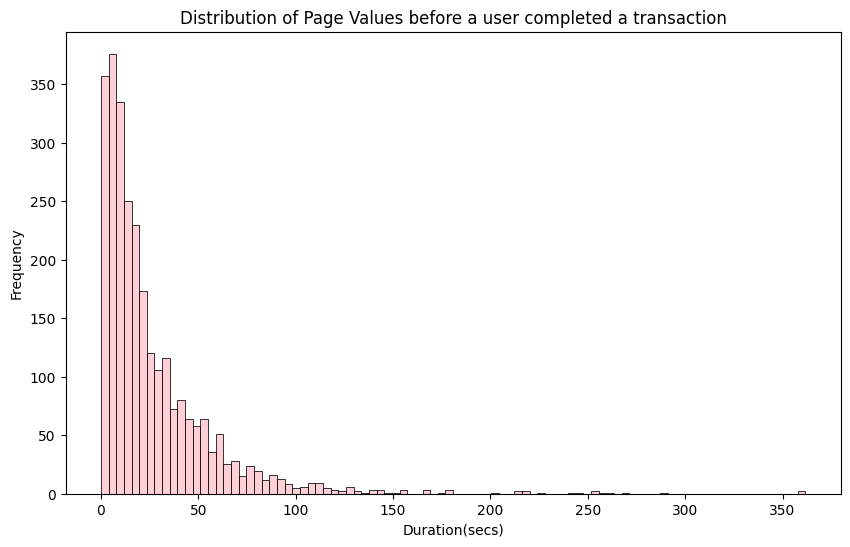

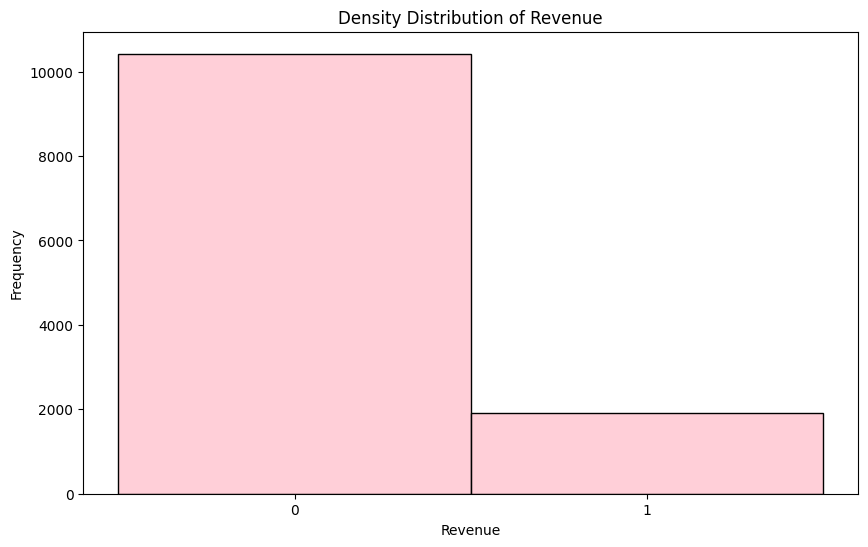

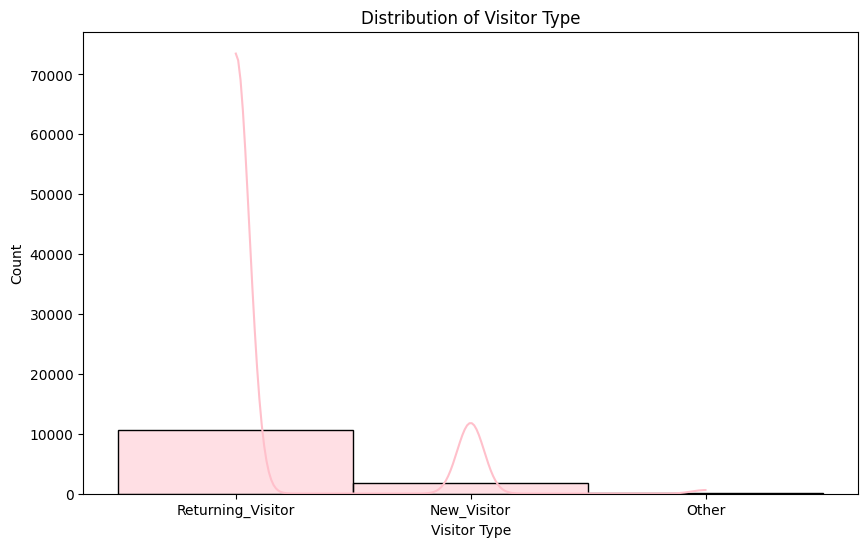

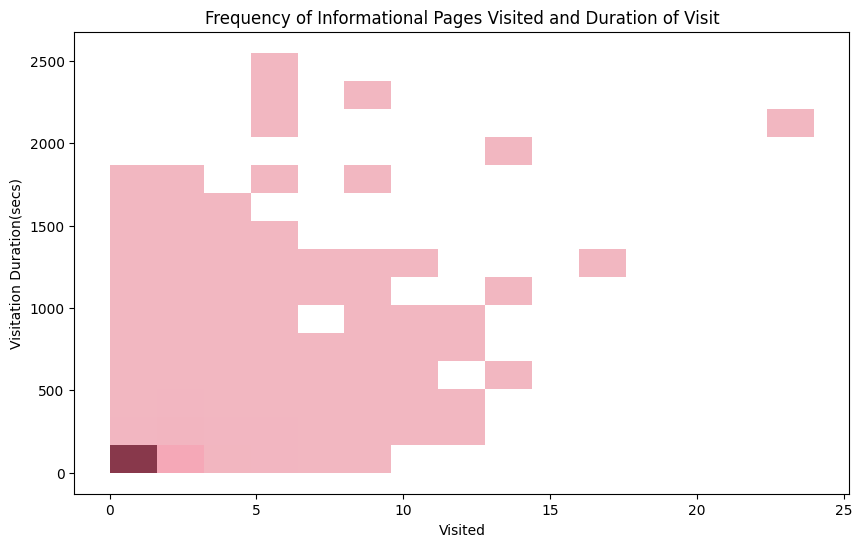

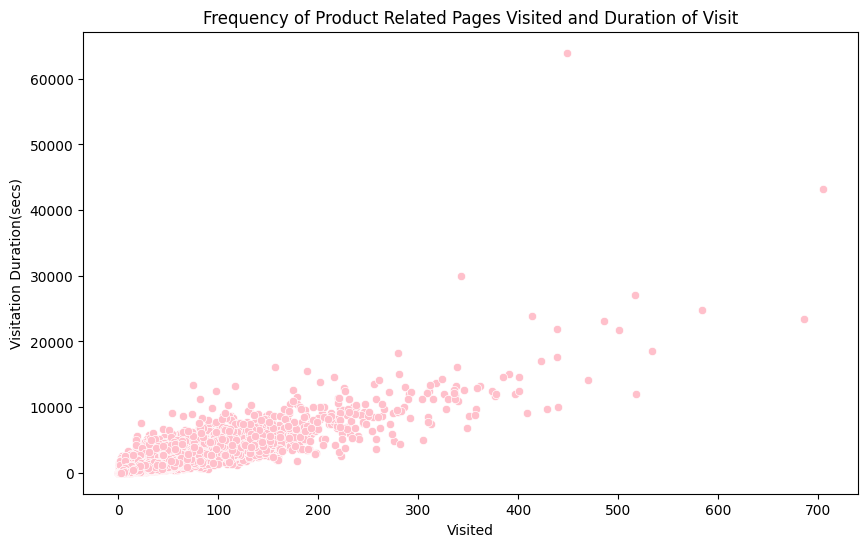

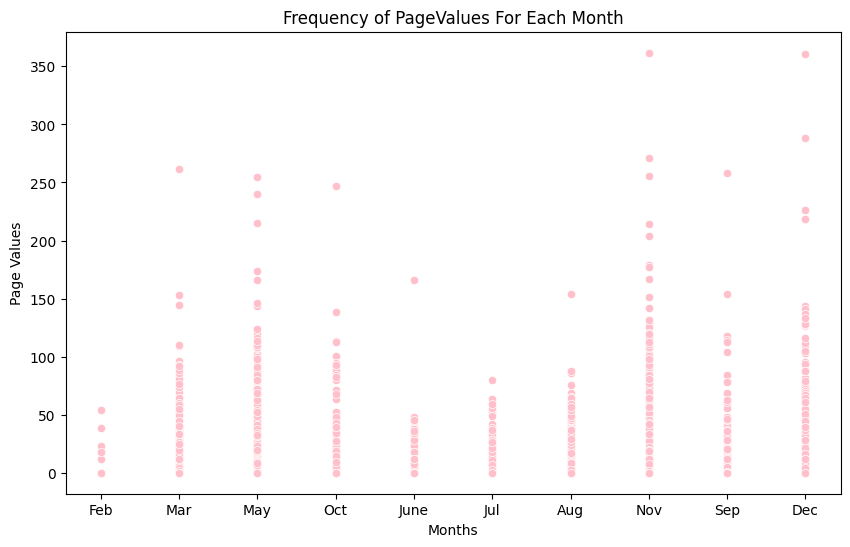

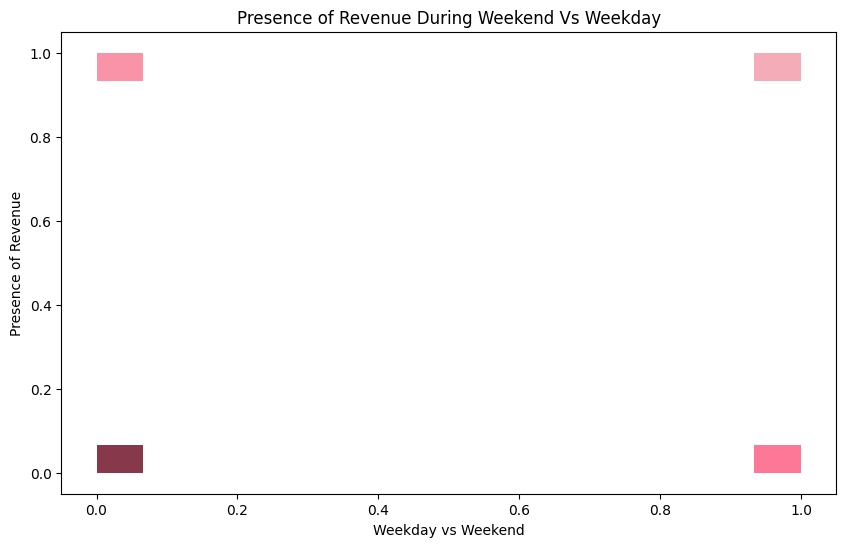

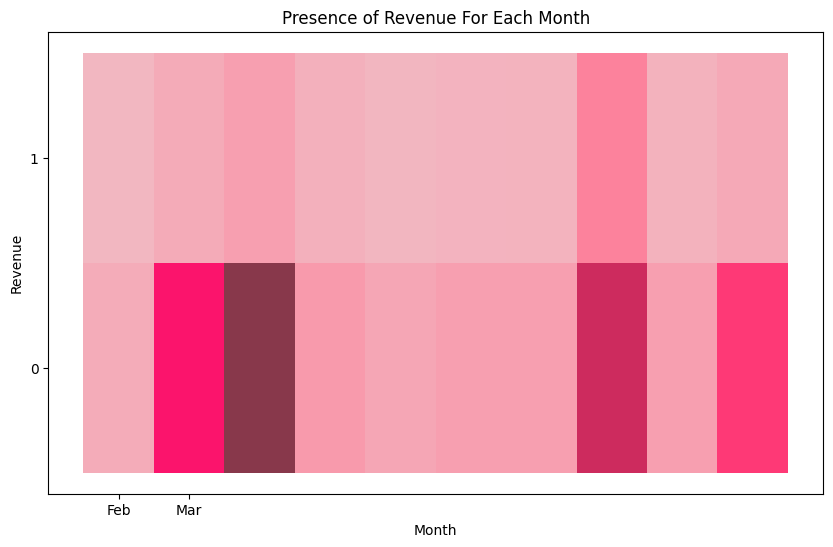

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of Page Value
plt.figure(figsize=(10, 6))
nonZero=X[X['PageValues']>0]
sns.histplot(nonZero['PageValues'], color='pink')
plt.title('Distribution of Page Values before a user completed a transaction')
plt.xlabel('Duration(secs)')
plt.ylabel('Frequency')
plt.show()

# Plot the distribution of Revenue
plt.figure(figsize=(10, 6))
sns.histplot(Y['Revenue'],color='pink', discrete=True, bins=[-0.5, 0.5, 1.5])
plt.title('Density Distribution of Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.xticks([0, 1]) 
plt.show()

# Plot the distribution of Visitor Type
plt.figure(figsize=(10, 6))
sns.histplot(X['VisitorType'], bins=20, kde=True, color='pink')
plt.title('Distribution of Visitor Type')
plt.xlabel('Visitor Type')
plt.ylabel('Count')
plt.show()

# Plot the distribution of Informational Page 
df_filtered = X[['Informational', 'Informational_Duration']]
plt.figure(figsize=(10, 6))
sns.histplot(y='Informational_Duration', x='Informational', data=df_filtered, color='pink')
plt.title('Frequency of Informational Pages Visited and Duration of Visit')
plt.xlabel('Visited')
plt.ylabel('Visitation Duration(secs)')
plt.show()

# Plot the distribution of Product Ralated Pages
df_filtered = X[['ProductRelated', 'ProductRelated_Duration']]
plt.figure(figsize=(10, 6))
sns.scatterplot(y='ProductRelated_Duration', x='ProductRelated', data=df_filtered, color='pink')
plt.title('Frequency of Product Related Pages Visited and Duration of Visit')
plt.xlabel('Visited')
plt.ylabel('Visitation Duration(secs)')
plt.show()

# Specify the order of education levels for proper plotting
month_order = [
    'Feb','Mar', 'Apr', 'May', 'Jun', 
    'Jul', 'Aug', 'Sept','Oct','Nov','Dec'
]
# Plot the distribution of Page Values and Months
df_filtered = X[['PageValues', 'Month']]
plt.figure(figsize=(10, 6))
sns.scatterplot(y='PageValues', x='Month', data=df_filtered, color='pink')
plt.title('Frequency of PageValues For Each Month')
plt.xlabel('Months')
plt.ylabel('Page Values')
plt.show()

# Plot the distribution of Revenue and Weekend
plt.figure(figsize=(10, 6))
sns.histplot(y='Revenue', x='Weekend', data=data, color='pink')
plt.title('Presence of Revenue During Weekend Vs Weekday')
plt.xlabel('Weekday vs Weekend')
plt.ylabel('Presence of Revenue')
plt.show()

# Plot the distribution of Revenue and Months
plt.figure(figsize=(10, 6))
sns.histplot(y='Revenue', x='Month', data=data, color='pink', bins=[-0.5, 0.5, 1.5])
plt.title('Presence of Revenue For Each Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks([0, 1]) 
plt.yticks([0, 1]) 
plt.show()